### Nearest Neighbour Regression and an Inverted U shape

In [1]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
diabetes["data"].shape

(442, 10)

In [2]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

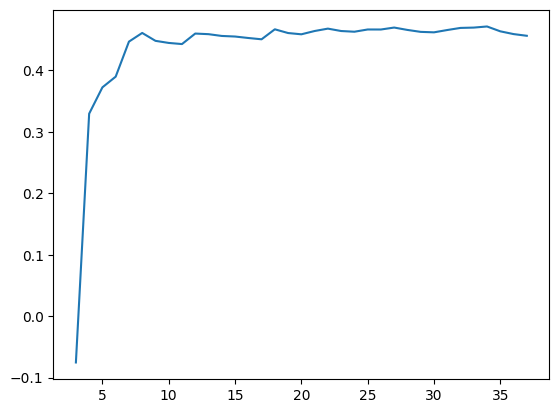

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt

X_train, X_test, Y_train, Y_test = train_test_split(diabetes['data'], diabetes['target'], random_state=42)

K_max = 35
results = np.empty(K_max)
for k in range(K_max):
    knn = KNeighborsRegressor(n_neighbors = k+1)
    knn.fit(X_train, Y_train)
    results[k] = knn.score(X_test, Y_test)
%matplotlib inline
plt.plot(np.arange(K_max)+3, results)

In [6]:
help(KNeighborsRegressor.score)

Help on function score in module sklearn.base:

score(self, X, y, sample_weight=None)
    Return the coefficient of determination of the prediction.
    
    The coefficient of determination :math:`R^2` is defined as
    :math:`(1 - \frac{u}{v})`, where :math:`u` is the residual
    sum of squares ``((y_true - y_pred)** 2).sum()`` and :math:`v`
    is the total sum of squares ``((y_true - y_true.mean()) ** 2).sum()``.
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always predicts
    the expected value of `y`, disregarding the input features, would get
    a :math:`R^2` score of 0.0.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples. For some estimators this may be a precomputed
        kernel matrix or a list of generic objects instead with shape
        ``(n_samples, n_samples_fitted)``, where ``n_samples_fitted``
        is the number of sample

### Using cross-validation to get an inverted U-shaped curve

In [7]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsRegressor(n_neighbors=3)
cross_val_score(knn, X_train, Y_train)

array([0.28743721, 0.24283699, 0.32312734, 0.32108514, 0.12845082])

In [10]:
from sklearn.utils import shuffle
X, Y = shuffle(diabetes["data"], diabetes["target"], random_state=42)
print(cross_val_score(knn, X, Y))

[0.36498737 0.32300369 0.26748019 0.43230668 0.40572547]


In [11]:
knn.fit(X_train, Y_train)
knn.score(X_test, Y_test)

0.37222167132521977

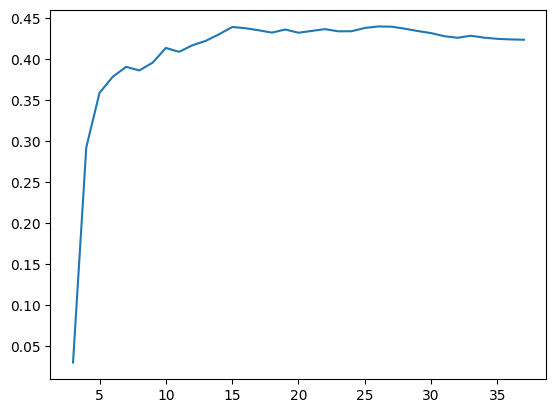

In [31]:
K_max = 35
for k in range(K_max):
    knn = KNeighborsRegressor(n_neighbors=k+1)
    results[k] = np.mean(cross_val_score(knn, X, Y))
plt.plot(np.arange(K_max)+3, results)    

Exercises
1. np.mean takes all accuracies of each fold in cross_val_score() and performs and average calculation on all the values to give a singular value that can be graphed.
2. For both calculations, the optimal K-value floats around the 20-30 range. It may even be argued that 10 would suffice. At large values of K, the accuracy of the predictor drops off drastically. Become less and less accurate as more neighbours are taken in to account.

### Learning Curves

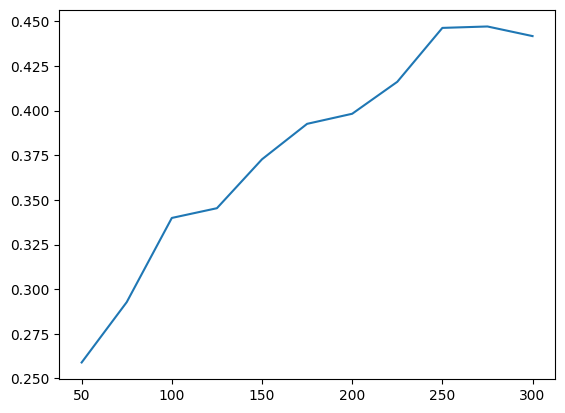

In [41]:
knn = KNeighborsRegressor(n_neighbors=10)
train_sizes = np.array([50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300])
results = np.empty(train_sizes.size)
for k in range(train_sizes.size):
    X_train, X_test, Y_train, Y_test = train_test_split(diabetes["data"], diabetes["target"], train_size = train_sizes[k], random_state=42)
    knn.fit(X_train, Y_train)
    results[k] = knn.score(X_test, Y_test)
plt.plot(train_sizes, results)

Exercises <br>
3. The accuracy is more of a positive linear graph. <br>
4. The size of the test set would be 22. If only test_size was specified, train_size would be the complement of test_size on the size of the dataset. You can specify both and they do not have to add up to the size of the dataset. 

### Value at Risk

In [43]:
n = 99
L = 10**6 * np.random.random((n)) - 10**6/2
print(L)

[ 233969.07489145   75735.14104425 -154062.26535846 -401541.30539747
   -6289.33477771 -457499.23694129  388009.30138941  229950.10541339
  299648.97081513  212482.29905076  122895.74859336  -95520.87283821
  290501.29335199  158247.96316032 -364301.53845736 -429688.98455133
  -48399.18489608 -131744.51742746  491587.82823849 -471051.3244384
 -292282.43640625  199729.86563792 -386443.57464487 -276124.89846376
  269130.48972821  255437.71484761  382364.22444598 -395653.90694745
 -441630.482735   -109438.55676939  -43264.35307555   81546.58440723
 -389309.85410899 -350022.73698778 -472229.9319875   186089.27859436
   45343.85724288 -366957.08365966 -106919.94587069  358761.95137191
   -1677.6752053   -22104.14653954  -90949.70785548  126421.26312254
  405975.58506094  441570.33747467 -206453.77083265 -124086.27609947
  -90313.71152407   93154.22823096  218445.34577718   70445.14777493
  248249.79685819 -214414.29673551  386605.26714334  121006.74241134
 -172281.70177809  132134.44488055 

In [45]:
sorted_L = np.sort(L)
VaR = sorted_L[-int(np.floor((n+1)/5))]
print(VaR)

290501.293351994


In [173]:
import math
def VaR(L):
    if L.size >= 4:
        return np.sort(L)[-int(np.floor((n+1)/5))]
    else:
        return math.inf

### Validity of conformal prediction: an empirical test

In [191]:
N = 500
L = 10**6 * np.random.random_sample((N)) - 10**6/2

In [192]:
successes = np.empty(N)
for n in range(N):
    V = VaR(L[:n])
    if L[n] <= V:
        successes[n] = 1
    else:
        successes[n] = 0
print(np.mean(successes))
    

0.79


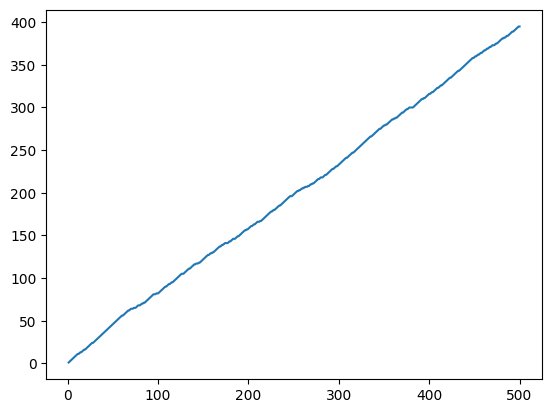

In [193]:
plt.plot(np.arange(N)+1, np.cumsum(successes))

Exercise <br>
5. cumsum is a cumulative sum where it takes the sum of all previous entries and current entry. 

### One more exercise

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris
X_train, X_test, Y_train, Y_test = train_test_split(load_iris)
